In [35]:
# importing needed modules
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
# to prevent warning
pd.options.mode.chained_assignment = None


In [36]:
# reading the dataset
df = pd.read_csv("traffic.csv",parse_dates=True, index_col='DateTime')

df1 = df[df["Junction"] == 1]
df2 = df[df["Junction"] == 2]
df3 = df[df["Junction"] == 3]
df4 = df[df["Junction"] == 4]


df1 = df1[['Vehicles']]
df2 = df2[['Vehicles']]
df3 = df3[['Vehicles']]
df4 = df4[['Vehicles']]

# df = df.values

In [37]:
train_start_dt = '2015-11-01 00:00:00'
test_start_dt = '2017-06-01 00:00:00'

train1 = df1.copy()[(df1.index >= train_start_dt) & (df1.index < test_start_dt)][['Vehicles']]
test1 = df1.copy()[df1.index >= test_start_dt][['Vehicles']]

train2 = df2.copy()[(df2.index >= train_start_dt) & (df2.index < test_start_dt)][['Vehicles']]
test2 = df2.copy()[df2.index >= test_start_dt][['Vehicles']]

train3 = df3.copy()[(df3.index >= train_start_dt) & (df3.index < test_start_dt)][['Vehicles']]
test3 = df3.copy()[df3.index >= test_start_dt][['Vehicles']]

train4 = df4.copy()[(df4.index >= '2017-01-01 00:00:00') & (df4.index < '2017-05-01 00:00:00')][['Vehicles']]
test4 = df4.copy()[df4.index >= '2017-06-01 00:00:00'][['Vehicles']]



In [38]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()
train1['Vehicles'] = scaler1.fit_transform(train1[['Vehicles']])
train2['Vehicles'] = scaler2.fit_transform(train2[['Vehicles']])
train3['Vehicles'] = scaler3.fit_transform(train3[['Vehicles']])
train4['Vehicles'] = scaler4.fit_transform(train4[['Vehicles']])

In [39]:
test1['Vehicles'] = scaler1.transform(test1[['Vehicles']])
test2['Vehicles'] = scaler2.transform(test2[['Vehicles']])
test3['Vehicles'] = scaler3.transform(test3[['Vehicles']])
test4['Vehicles'] = scaler4.transform(test4[['Vehicles']])

In [40]:

train_data1 = train1.values
test_data1 = test1.values

train_data2 = train2.values
test_data2 = test2.values

train_data3 = train3.values
test_data3 = test3.values

train_data4 = train4.values
test_data4 = test4.values

In [41]:
timesteps = 90
train_data1_timesteps=np.array([[j for j in train_data1[i:i+timesteps]] for i in range(0,len(train_data1)-timesteps+1)])[:,:,0]
test_data1_timesteps=np.array([[j for j in test_data1[i:i+timesteps]] for i in range(0,len(test_data1)-timesteps+1)])[:,:,0]

train_data2_timesteps=np.array([[j for j in train_data2[i:i+timesteps]] for i in range(0,len(train_data2)-timesteps+1)])[:,:,0]
test_data2_timesteps=np.array([[j for j in test_data2[i:i+timesteps]] for i in range(0,len(test_data2)-timesteps+1)])[:,:,0]

train_data3_timesteps=np.array([[j for j in train_data3[i:i+timesteps]] for i in range(0,len(train_data3)-timesteps+1)])[:,:,0]
test_data3_timesteps=np.array([[j for j in test_data3[i:i+timesteps]] for i in range(0,len(test_data3)-timesteps+1)])[:,:,0]

train_data4_timesteps=np.array([[j for j in train_data4[i:i+timesteps]] for i in range(0,len(train_data4)-timesteps+1)])[:,:,0]
test_data4_timesteps=np.array([[j for j in test_data4[i:i+timesteps]] for i in range(0,len(test_data4)-timesteps+1)])[:,:,0]

In [42]:

x_train1, y_train1 = train_data1_timesteps[:,:timesteps-1],train_data1_timesteps[:,[timesteps-1]]
x_test1, y_test1 = test_data1_timesteps[:,:timesteps-1],test_data1_timesteps[:,[timesteps-1]]

x_train2, y_train2 = train_data2_timesteps[:,:timesteps-1],train_data2_timesteps[:,[timesteps-1]]
x_test2, y_test2 = test_data2_timesteps[:,:timesteps-1],test_data2_timesteps[:,[timesteps-1]]

x_train3, y_train3 = train_data3_timesteps[:,:timesteps-1],train_data3_timesteps[:,[timesteps-1]]
x_test3, y_test3 = test_data3_timesteps[:,:timesteps-1],test_data3_timesteps[:,[timesteps-1]]

x_train4, y_train4 = train_data4_timesteps[:,:timesteps-1],train_data4_timesteps[:,[timesteps-1]]
x_test4, y_test4 = test_data4_timesteps[:,:timesteps-1],test_data4_timesteps[:,[timesteps-1]]

In [43]:
svr1 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr2 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr3 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr4 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

svr1.fit(x_train1, y_train1[:,0])
svr2.fit(x_train2, y_train2[:,0])
svr3.fit(x_train3, y_train3[:,0])
svr4.fit(x_train4, y_train4[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [44]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()
rf3 = RandomForestRegressor()
rf4 = RandomForestRegressor()

rf1.fit(x_train1, y_train1[:,0])
rf2.fit(x_train2, y_train2[:,0])
rf3.fit(x_train3, y_train3[:,0])
rf4.fit(x_train4, y_train4[:,0])

RandomForestRegressor()

In [45]:
print(svr1.score(x_test1, y_test1[:,0]))
print(rf1.score(x_test1, y_test1[:,0]))

0.9385363844609329
0.9602304403834833


In [46]:
df_nextyear_j1 = df1.copy()[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-01-04 18:00:00')][['Vehicles']]
datetime_object = datetime.strptime('2017-01-04 18:00:00', '%Y-%m-%d %H:%M:%S')

print(len(df_nextyear_j1))
df_nextyear_j1['Vehicles'] = scaler1.transform(df_nextyear_j1[['Vehicles']])


nextyear_j1 = df_nextyear_j1.values
nextyear_j1 = nextyear_j1[-89:][:,0]
print(nextyear_j1)
while datetime_object < datetime.strptime('2017-06-30 00:00:00', '%Y-%m-%d %H:%M:%S'):
    datetime_object += timedelta(hours=1) 
    temp_p = svr1.predict([nextyear_j1[-89:]])
    nextyear_j1 = np.append(nextyear_j1,temp_p)
    df_nextyear_j1.loc[datetime_object] = temp_p

90
[0.1192053  0.0794702  0.07284768 0.07284768 0.05960265 0.05960265
 0.08609272 0.09933775 0.11258278 0.10596026 0.12582781 0.09933775
 0.10596026 0.13907285 0.16556291 0.17880795 0.14569536 0.19205298
 0.20529801 0.22516556 0.23178808 0.21854305 0.21192053 0.19205298
 0.1589404  0.14569536 0.11258278 0.12582781 0.09271523 0.09933775
 0.11258278 0.17218543 0.21854305 0.35099338 0.38410596 0.39735099
 0.31125828 0.37748344 0.43708609 0.39072848 0.35761589 0.32450331
 0.33774834 0.32450331 0.35761589 0.41059603 0.31788079 0.29139073
 0.21854305 0.18543046 0.17218543 0.13245033 0.13245033 0.19205298
 0.17880795 0.25165563 0.29801325 0.38410596 0.50993377 0.50993377
 0.41059603 0.49668874 0.49006623 0.47682119 0.45033113 0.47019868
 0.47682119 0.47682119 0.51655629 0.50331126 0.41059603 0.40397351
 0.30463576 0.27152318 0.2384106  0.23178808 0.17880795 0.21192053
 0.21854305 0.24503311 0.29139073 0.39735099 0.43708609 0.48344371
 0.42384106 0.46357616 0.48344371 0.45695364 0.42384106]


In [47]:
nextyear_pred_j1 = scaler1.inverse_transform(df_nextyear_j1)

In [48]:
nextyear_timestamps_j1 = df_nextyear_j1.index

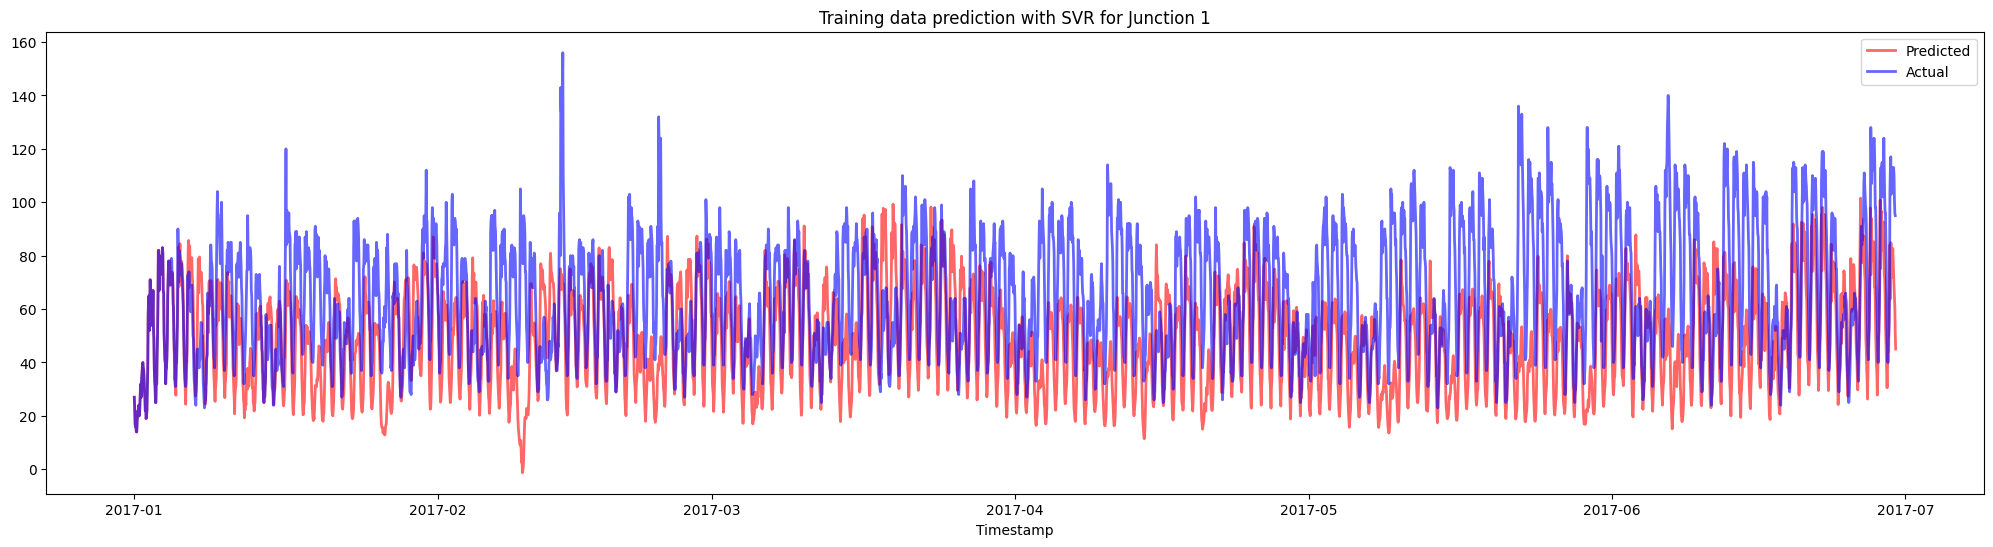

In [49]:
train_timestamps1 = df1[(df1.index < '2017-06-30 00:00:00') & (df1.index >= '2017-01-01 00:00:00')].index
train4 = df1.copy()[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-06-30 00:00:00')][['Vehicles']]
plt.figure(figsize=(25,6))

plt.plot(nextyear_timestamps_j1, nextyear_pred_j1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps1, train4, color = 'blue', linewidth=2.0, alpha = 0.6)

plt.legend(['Predicted','Actual'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 1")
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.special import huber
import tensorflow as tf
svrp = (svr1.predict(x_test1))
print("MAE:",mean_absolute_error( y_test1[:,0],svrp))
print("MSE:",mean_squared_error( y_test1[:,0],svrp))
print("RMSE:",mean_squared_error( y_test1[:,0],svrp,squared=False))
print("MAPE:",mean_absolute_percentage_error( y_test1[:,0],svrp))
huberLoss = tf.keras.losses.Huber()
print("HuberLoss:",huberLoss(y_test1[:,0], svrp).numpy())
rfp = (rf1.predict(x_test1))
print("rf:")
print("MAE:",mean_absolute_error( y_test1[:,0],rfp))
print("MSE:",mean_squared_error( y_test1[:,0],rfp))
print("RMSE:",mean_squared_error( y_test1[:,0],rfp,squared=False))
print("MAPE:",mean_absolute_percentage_error( y_test1[:,0],rfp))
huberLoss = tf.keras.losses.Huber()
print("HuberLoss:",huberLoss(y_test1[:,0], rfp).numpy())

MAE: 0.03507340645619753
MSE: 0.0020226363559686313
RMSE: 0.04497372962039763
MAPE: 0.08854816948582206
HuberLoss: 0.0010113182
rf:
MAE: 0.02640778329362625
MSE: 0.0013087312946974366
RMSE: 0.0361763913996053
MAPE: 0.05873876537616322
HuberLoss: 0.00065436563


In [51]:
y_train_pred_svr_j1 = svr1.predict(x_train1).reshape(-1,1)
y_test_pred_svr_j1 = svr1.predict(x_test1).reshape(-1,1)

y_train_pred_svr_j2 = svr2.predict(x_train2).reshape(-1,1)
y_test_pred_svr_j2 = svr2.predict(x_test2).reshape(-1,1)

y_train_pred_svr_j3 = svr3.predict(x_train3).reshape(-1,1)
y_test_pred_svr_j3 = svr3.predict(x_test3).reshape(-1,1)

y_train_pred_svr_j4 = svr4.predict(x_train4).reshape(-1,1)
y_test_pred_svr_j4 = svr4.predict(x_test4).reshape(-1,1)

In [52]:
y_train_pred_rf_j1 = rf1.predict(x_train1).reshape(-1,1)
y_test_pred_rf_j1 = rf1.predict(x_test1).reshape(-1,1)

y_train_pred_rf_j2 = rf2.predict(x_train2).reshape(-1,1)
y_test_pred_rf_j2 = rf2.predict(x_test2).reshape(-1,1)

y_train_pred_rf_j3 = rf3.predict(x_train3).reshape(-1,1)
y_test_pred_rf_j3 = rf3.predict(x_test3).reshape(-1,1)

y_train_pred_rf_j4 = rf4.predict(x_train4).reshape(-1,1)
y_test_pred_rf_j4 = rf4.predict(x_test4).reshape(-1,1)

In [53]:
# Scaling the predictions

y_train_pred_svr_j1 = scaler1.inverse_transform(y_train_pred_svr_j1)
y_test_pred_svr_j1 = scaler1.inverse_transform(y_test_pred_svr_j1)

y_train_pred_svr_j2 = scaler2.inverse_transform(y_train_pred_svr_j2)
y_test_pred_svr_j2 = scaler2.inverse_transform(y_test_pred_svr_j2)

y_train_pred_svr_j3 = scaler3.inverse_transform(y_train_pred_svr_j3)
y_test_pred_svr_j3 = scaler3.inverse_transform(y_test_pred_svr_j3)

y_train_pred_svr_j4 = scaler4.inverse_transform(y_train_pred_svr_j4)
y_test_pred_svr_j4 = scaler4.inverse_transform(y_test_pred_svr_j4)


In [54]:
# Scaling the predictions

y_train_pred_rf_j1 = scaler1.inverse_transform(y_train_pred_rf_j1)
y_test_pred_rf_j1 = scaler1.inverse_transform(y_test_pred_rf_j1)

y_train_pred_rf_j2 = scaler2.inverse_transform(y_train_pred_rf_j2)
y_test_pred_rf_j2 = scaler2.inverse_transform(y_test_pred_rf_j2)

y_train_pred_rf_j3 = scaler3.inverse_transform(y_train_pred_rf_j3)
y_test_pred_rf_j3 = scaler3.inverse_transform(y_test_pred_rf_j3)

y_train_pred_rf_j4 = scaler4.inverse_transform(y_train_pred_rf_j4)
y_test_pred_rf_j4 = scaler4.inverse_transform(y_test_pred_rf_j4)


In [55]:
y_train1 = scaler1.inverse_transform(y_train1)
y_test1 = scaler1.inverse_transform(y_test1)

y_train2 = scaler2.inverse_transform(y_train2)
y_test2 = scaler2.inverse_transform(y_test2)

y_train3 = scaler3.inverse_transform(y_train3)
y_test3 = scaler3.inverse_transform(y_test3)

y_train4 = scaler4.inverse_transform(y_train4)
y_test4 = scaler4.inverse_transform(y_test4)



In [56]:
train_timestamps1 = df1[(df1.index < test_start_dt) & (df1.index >= train_start_dt)].index[timesteps-1:]
test_timestamps1 = df1[test_start_dt:].index[timesteps-1:]

train_timestamps2 = df2[(df2.index < test_start_dt) & (df2.index >= train_start_dt)].index[timesteps-1:]
test_timestamps2 = df2[test_start_dt:].index[timesteps-1:]

train_timestamps3 = df3[(df3.index < test_start_dt) & (df3.index >= train_start_dt)].index[timesteps-1:]
test_timestamps3 = df3[test_start_dt:].index[timesteps-1:]

train_timestamps4 = df4[(df4.index < '2017-05-01 00:00:00') & (df4.index >= '2017-01-01 00:00:00')].index[timesteps-1:]
test_timestamps4 = df4['2017-05-01 00:00:00':].index[timesteps-1:]


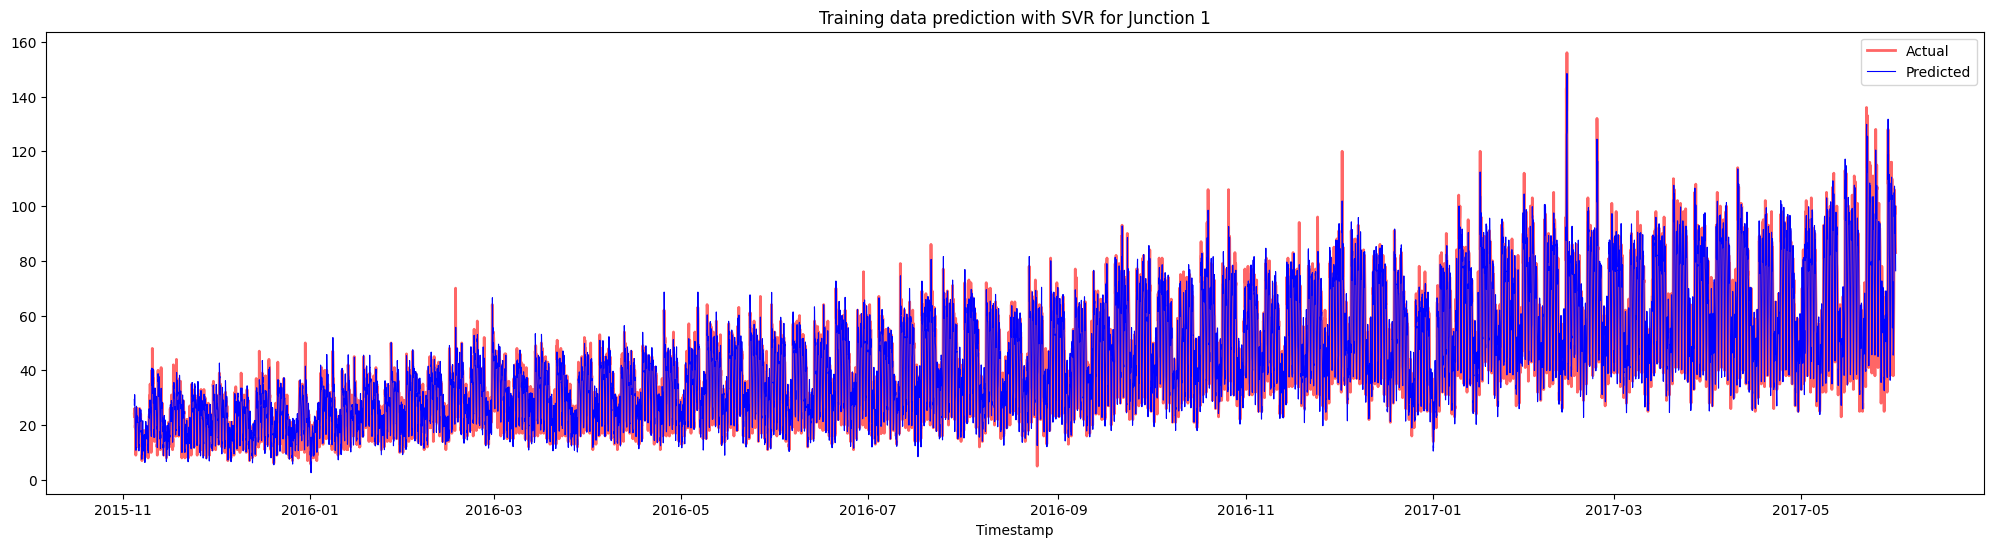

In [57]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps1, y_train1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps1, y_train_pred_svr_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 1")
plt.show()

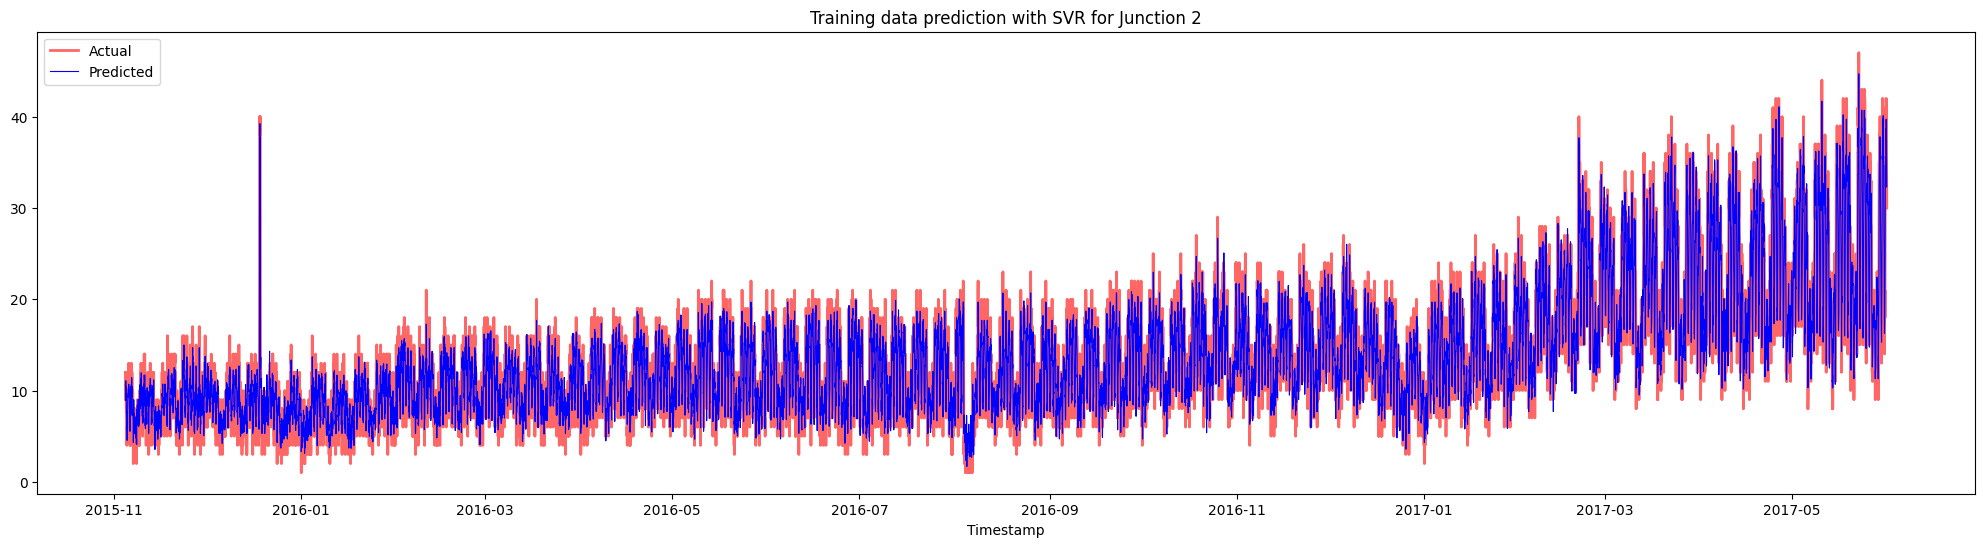

In [58]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps2, y_train2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps2, y_train_pred_svr_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 2")
plt.show()

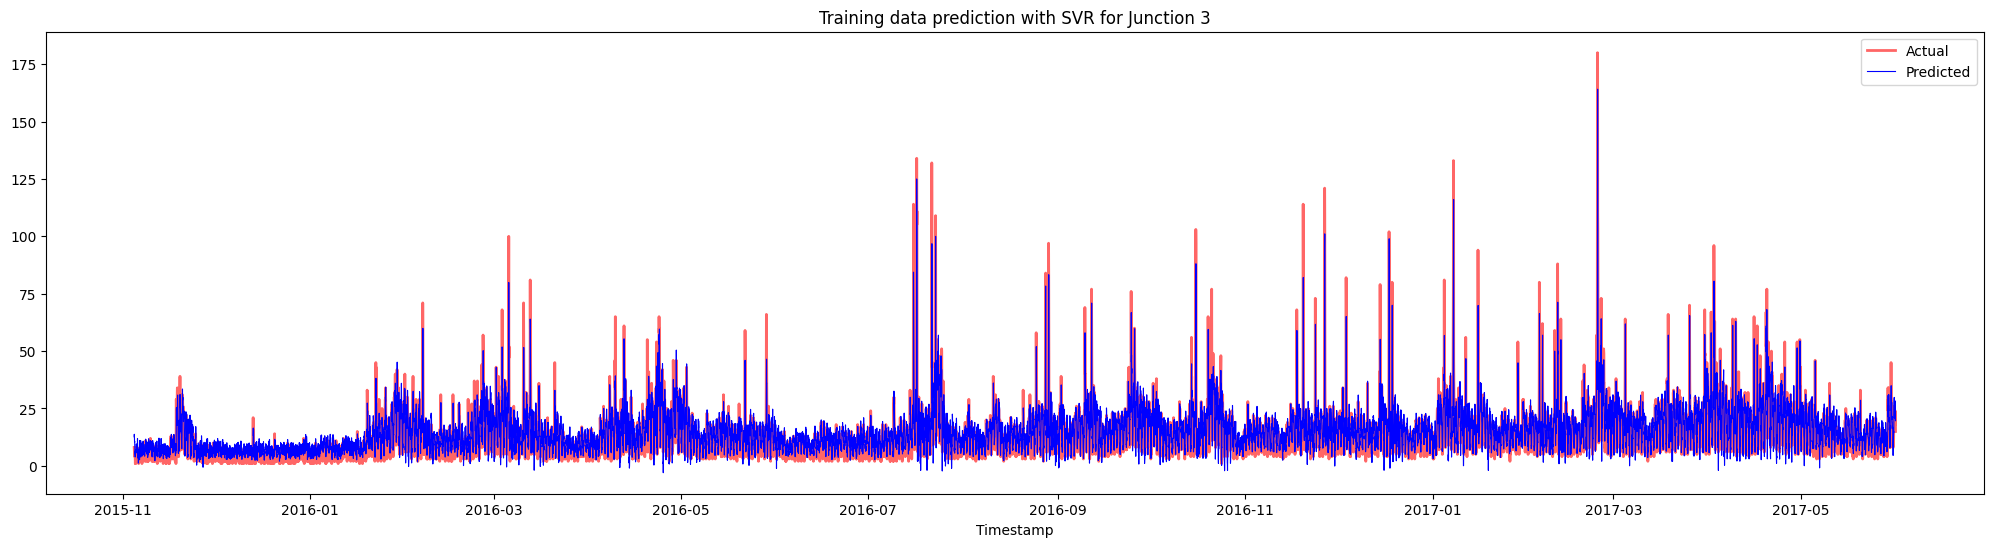

In [59]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps3, y_train3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps3, y_train_pred_svr_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 3")
plt.show()

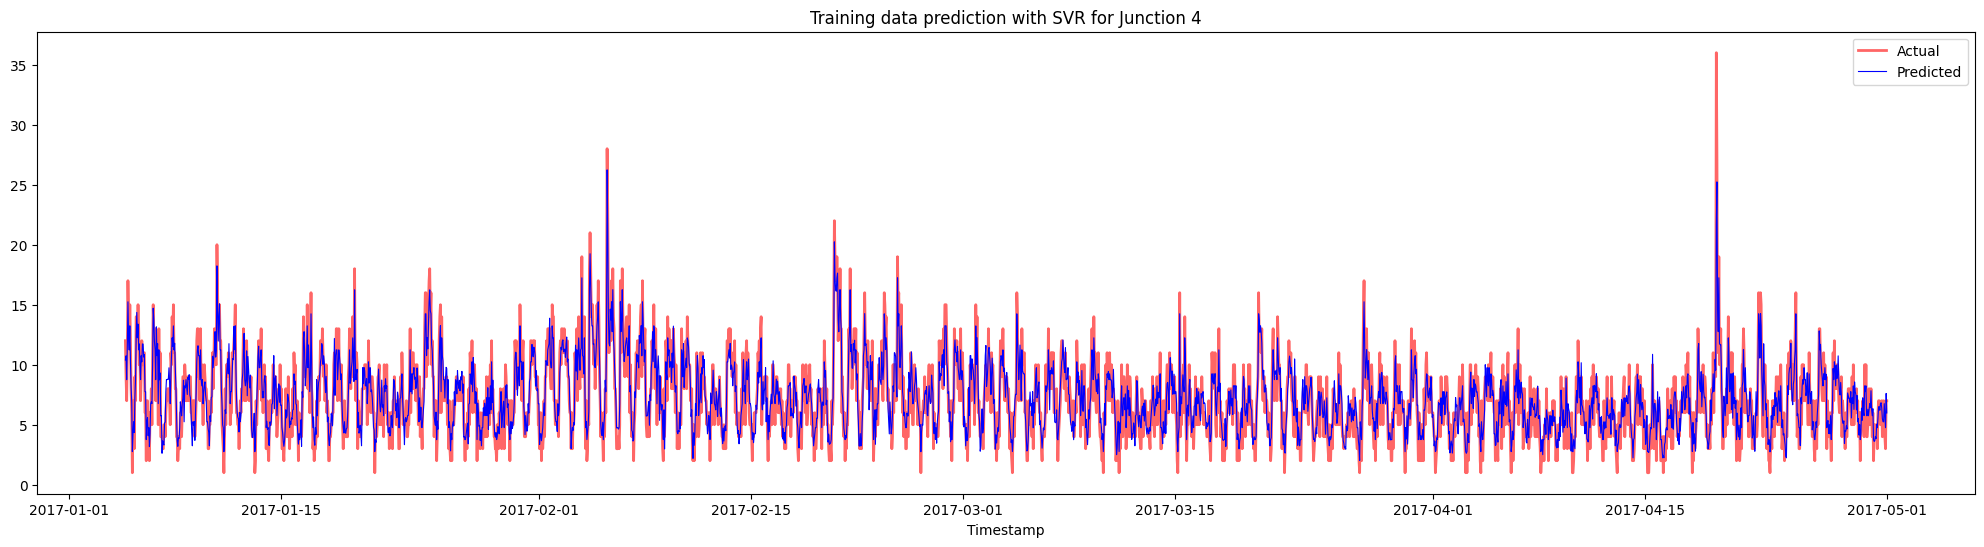

In [60]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps4, y_train4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps4, y_train_pred_svr_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 4")
plt.show()

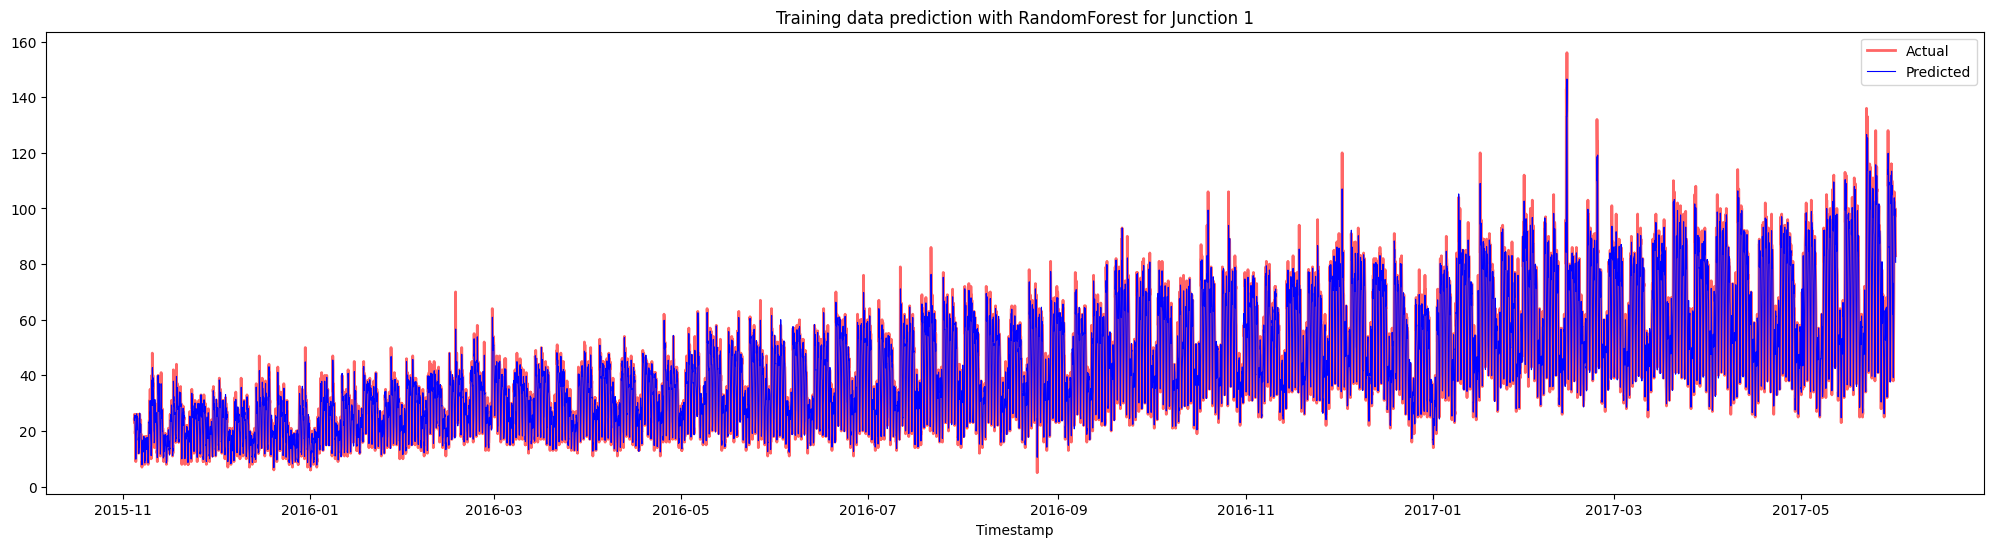

In [61]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps1, y_train1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps1, y_train_pred_rf_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 1")
plt.show()

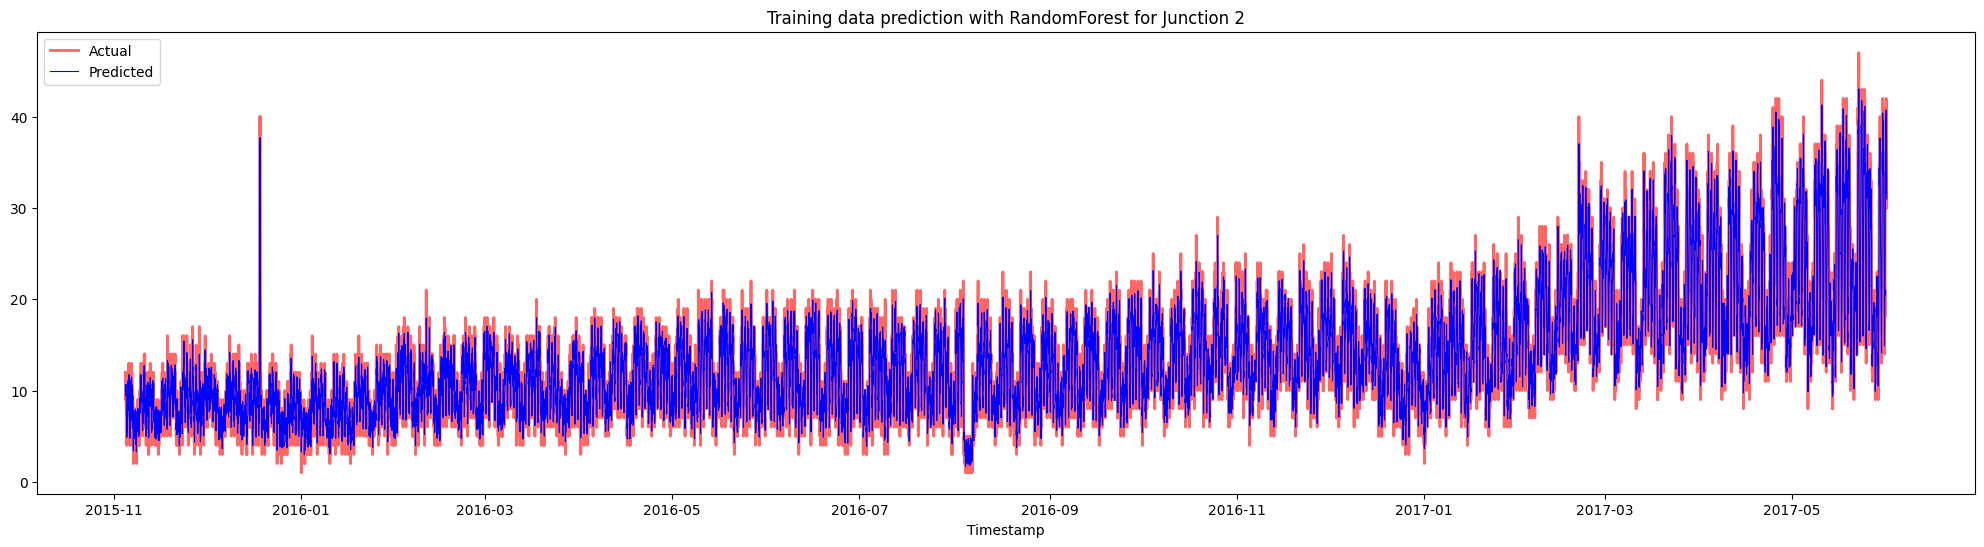

In [62]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps2, y_train2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps2, y_train_pred_rf_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 2")
plt.show()

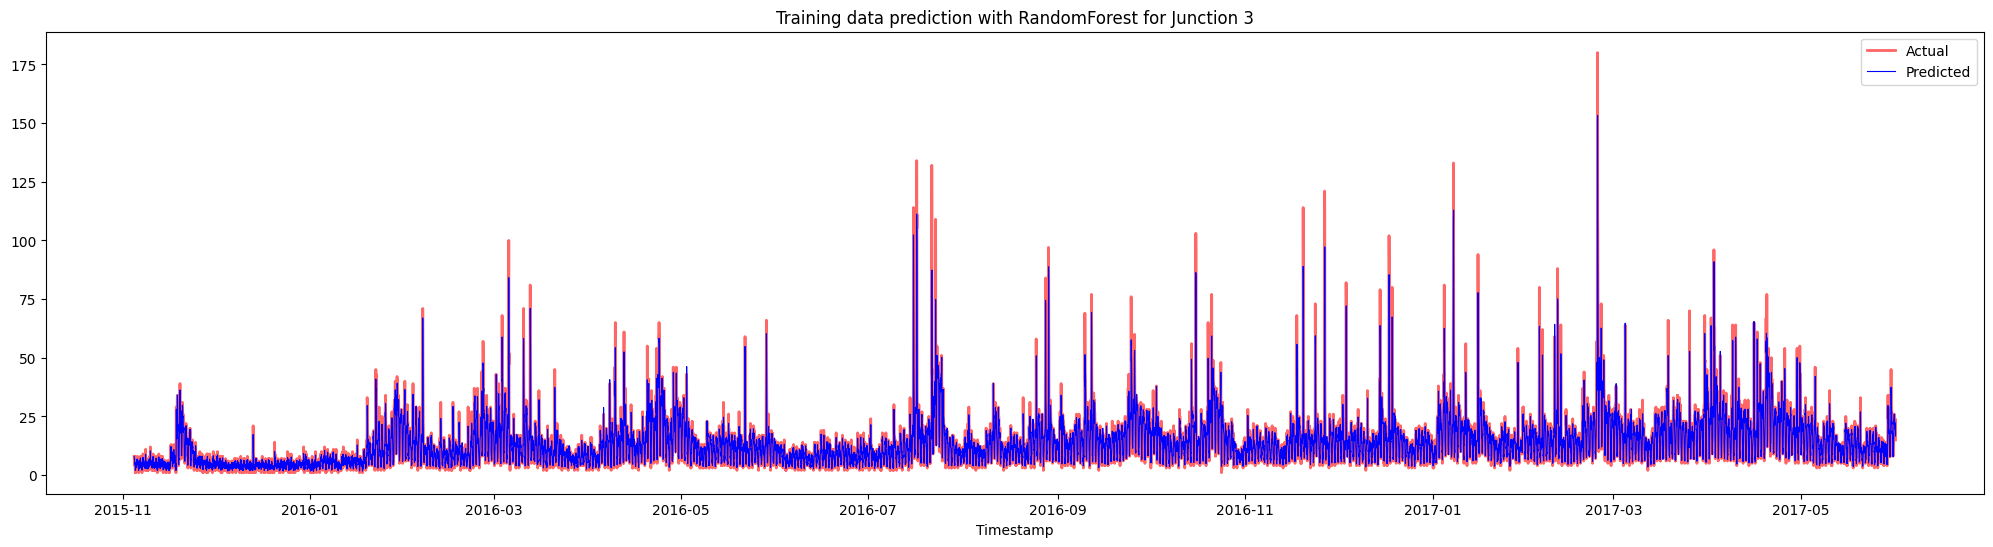

In [63]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps3, y_train3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps3, y_train_pred_rf_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 3")
plt.show()

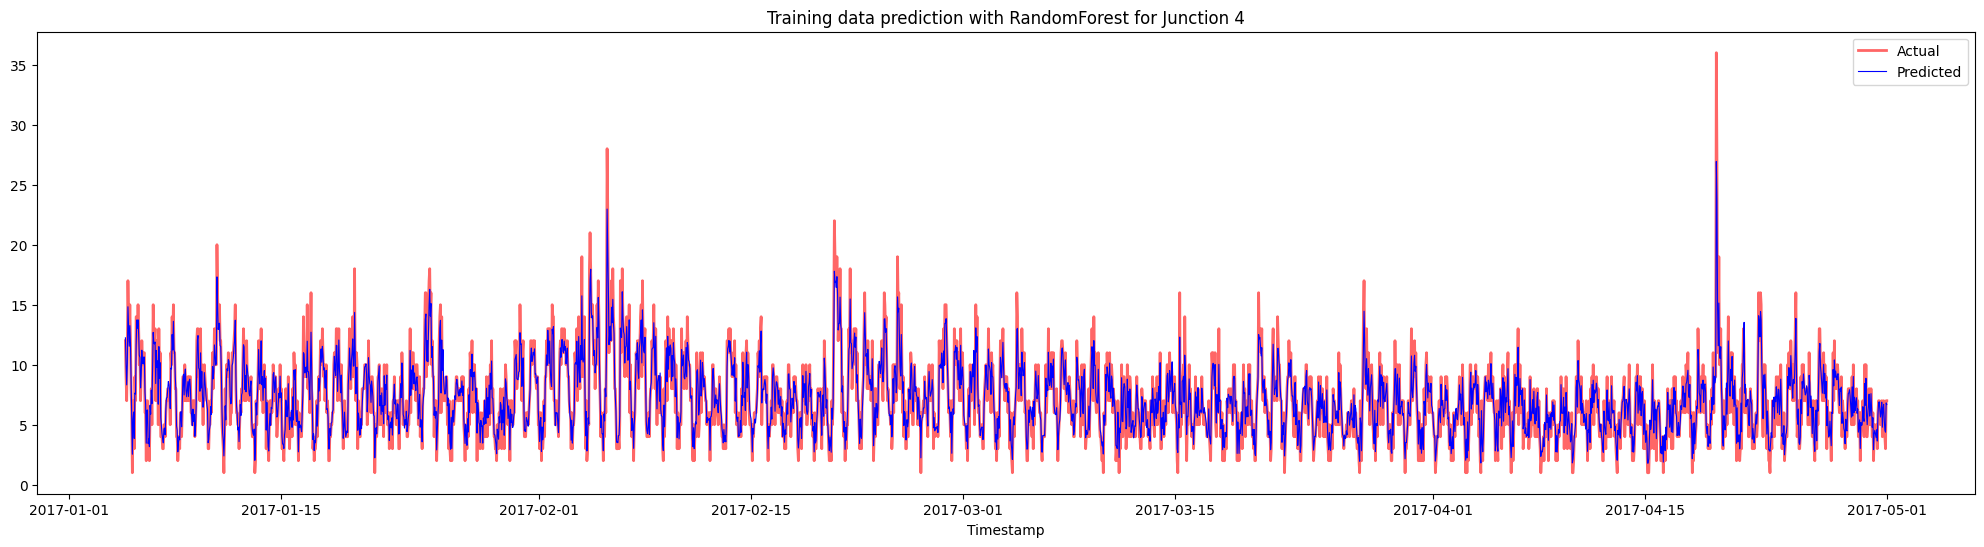

In [64]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps4, y_train4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps4, y_train_pred_rf_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 4")
plt.show()

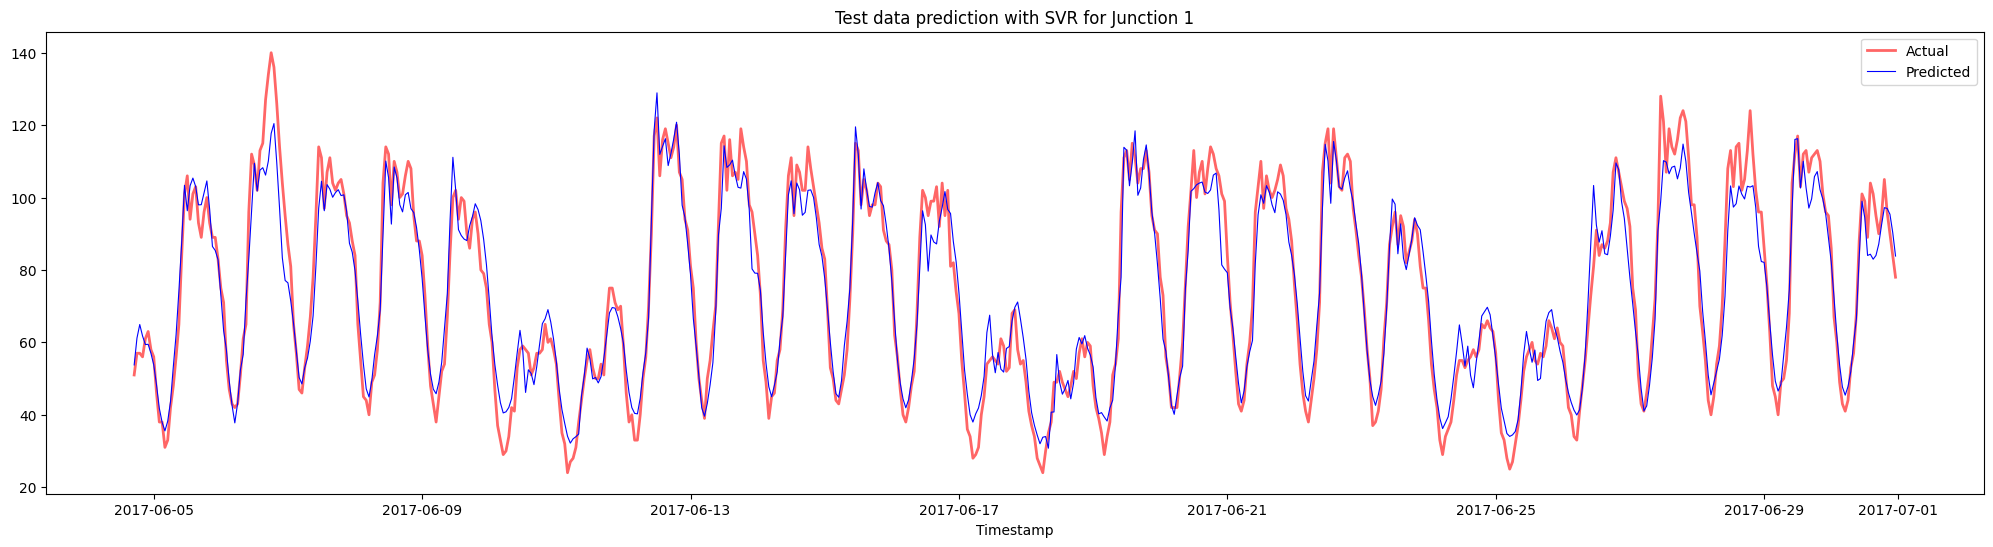

In [65]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps1, y_test1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps1, y_test_pred_svr_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 1")
plt.show()

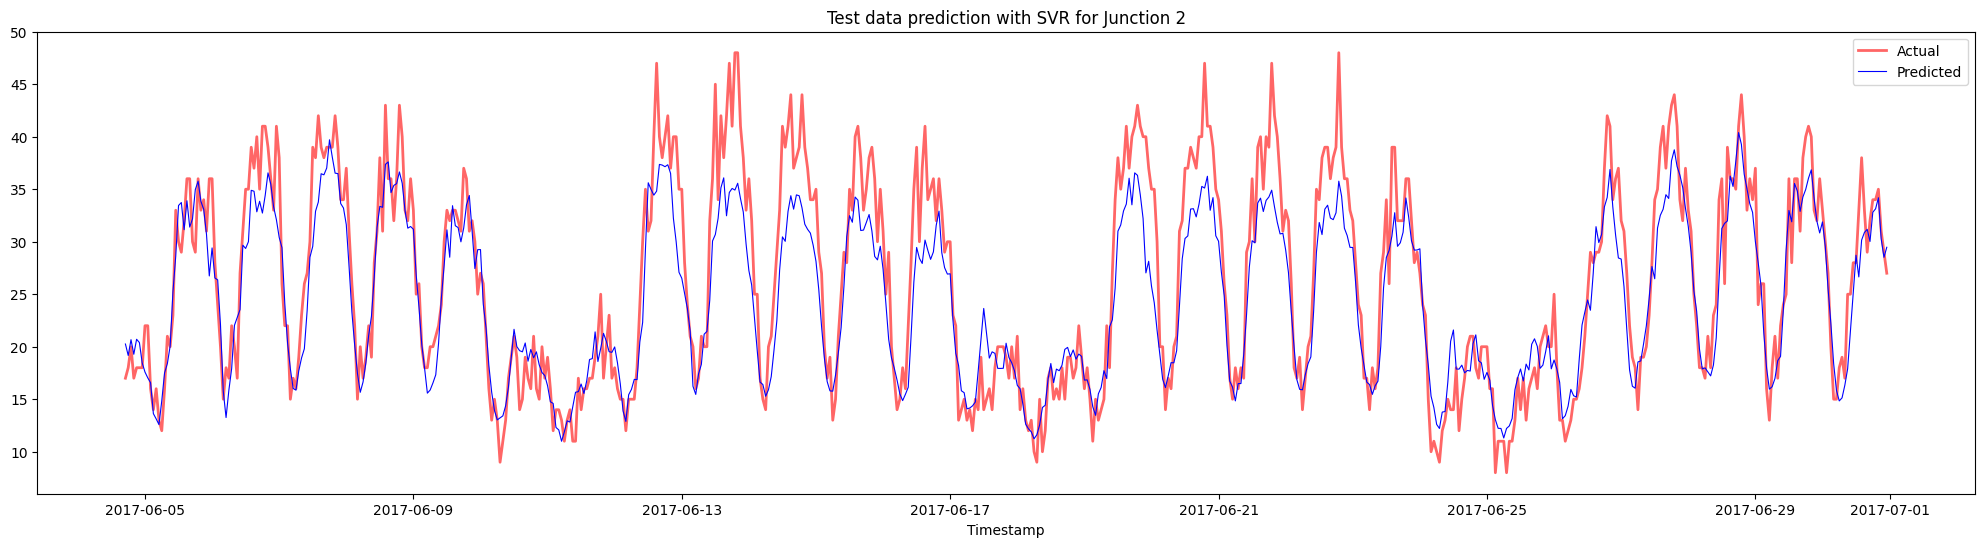

In [66]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps2, y_test2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps2, y_test_pred_svr_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 2")
plt.show()

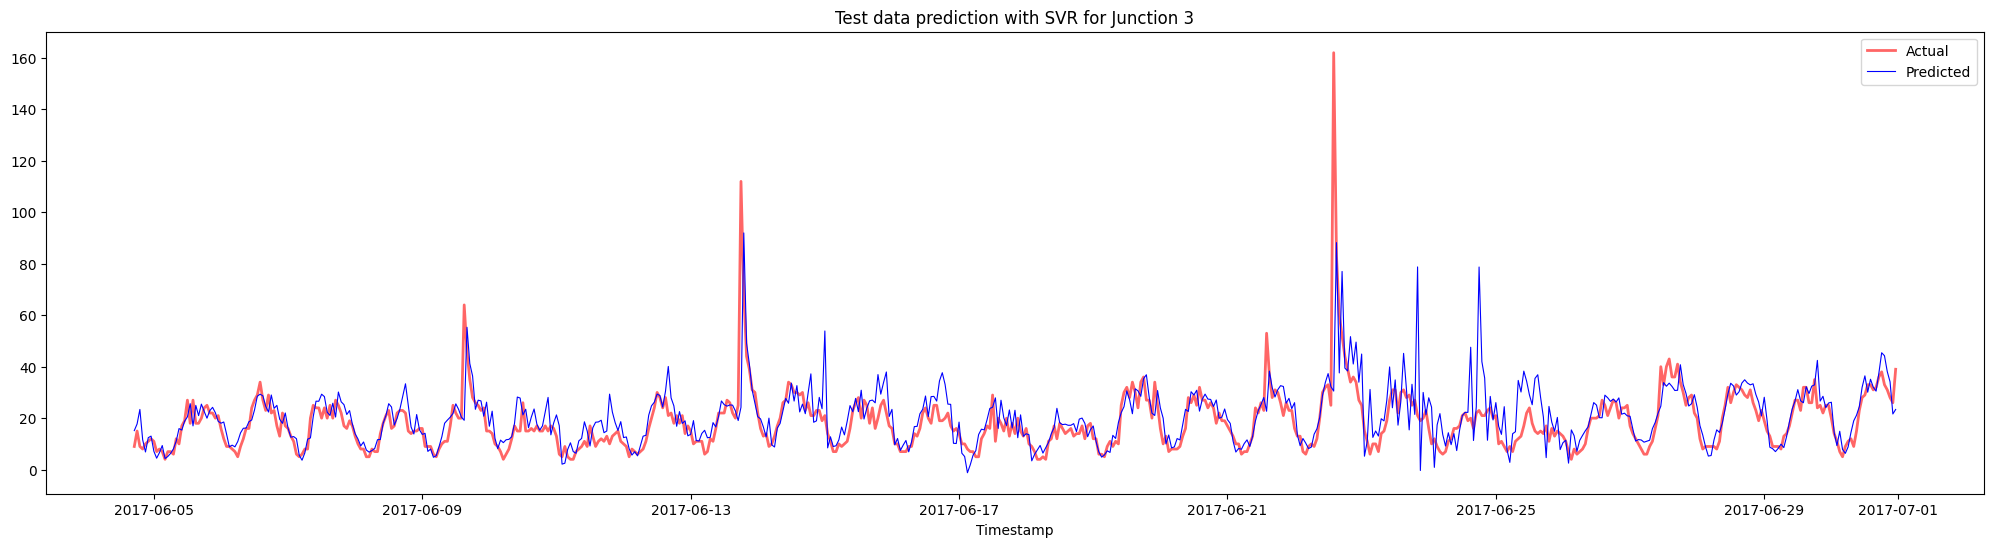

In [67]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps3, y_test3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps3, y_test_pred_svr_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 3")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1375,) and (631, 1)

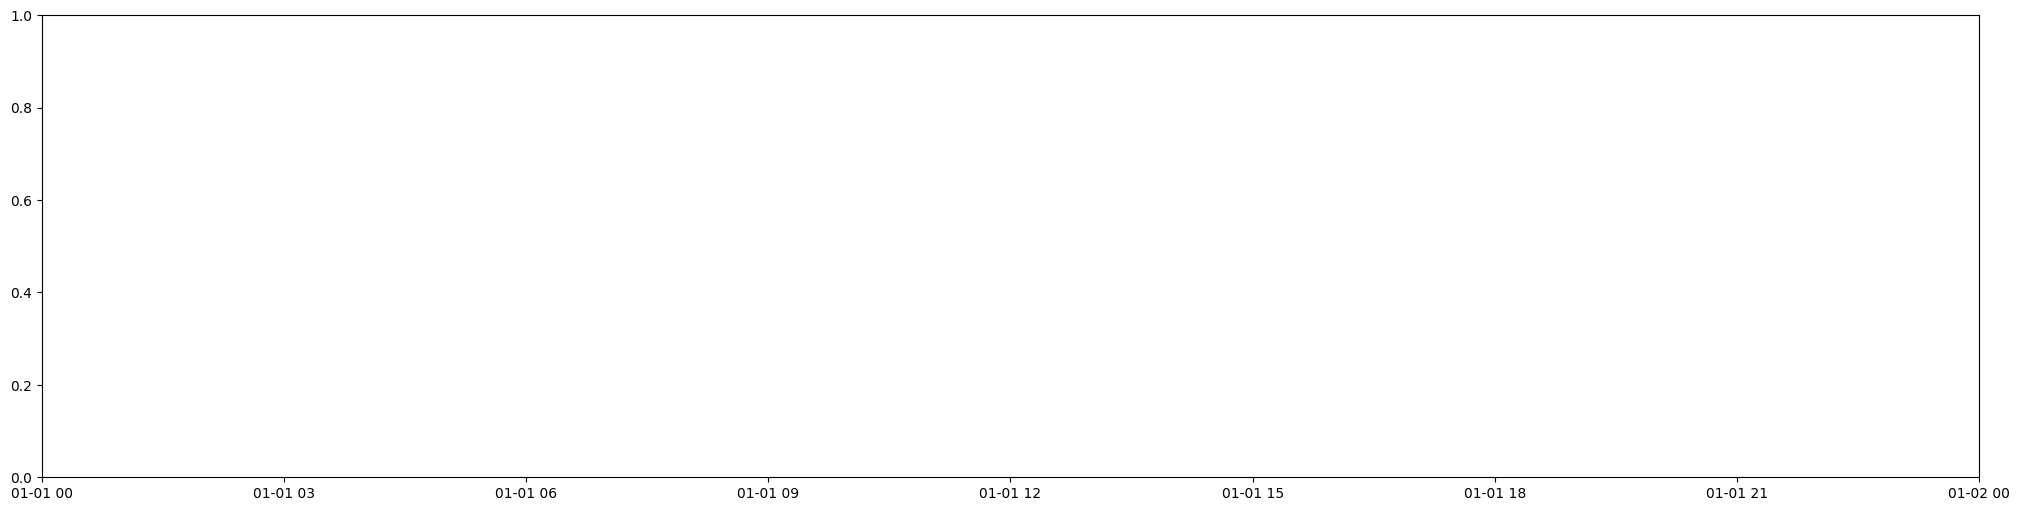

In [68]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps4, y_test4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps4, y_test_pred_svr_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 4")
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps1, y_test1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps1, y_test_pred_rf_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 1")
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps2, y_test2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps2, y_test_pred_rf_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 2")
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps3, y_test3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps3, y_test_pred_rf_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 3")
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps4, y_test4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps4, y_test_pred_rf_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 4")
plt.show()